##This notebook assesses how efficient a CNN is at classifying pole moves based on the small dataset.

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#get csv of just images and classes
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/pointYourPoseResearchColabs/pole_poses_no_outliers_csvs_out.csv')
df = df.iloc[:,:2]
df.head

<bound method NDFrame.head of         scissor0.jpg  scissorSit
0       scissor1.jpg  scissorSit
1      scissor10.jpg  scissorSit
2     scissor100.jpg  scissorSit
3     scissor103.jpg  scissorSit
4     scissor105.jpg  scissorSit
..               ...         ...
303  butterfly95.jpg   butterfly
304  butterfly96.jpg   butterfly
305  butterfly97.jpg   butterfly
306  butterfly98.jpg   butterfly
307  butterfly99.jpg   butterfly

[308 rows x 2 columns]>

In [ ]:
#place classes into test/train folders
#use flow from csv/ directory generator

In [ ]:
# import os module for image formatting and file management
import os
# import cv2
# from scipy import ndimage
import matplotlib.pyplot as plt
# import matplotlib.image as mpllimg

# lists to store classes
butterflyList = []
scissorSitList = []
supermanList = []

# place slices into lists
def read_img(file):
  poleImage = plt.imread(file)
  return poleImage

butterflyDir = '/content/drive/MyDrive/polePoseRecognition/butterfly'
for file in os.listdir(butterflyDir):
    butterflyList.append(read_img(butterflyDir + '/' + file))

scissorSitDir = '/content/drive/MyDrive/polePoseRecognition/scissorSit'
for file in os.listdir(scissorSitDir):
    scissorSitList.append(read_img(scissorSitDir + '/' + file))

supermanDir = '/content/drive/MyDrive/polePoseRecognition/superman'
for file in os.listdir(supermanDir):
    supermanList.append(read_img(supermanDir + '/' + file))

Total butterfly images: 142



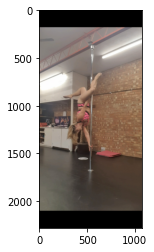

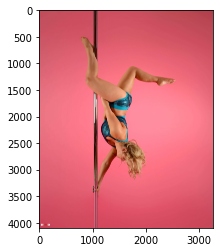

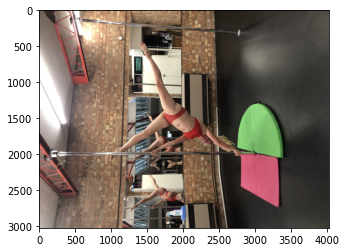

Total scissorSit images: 116



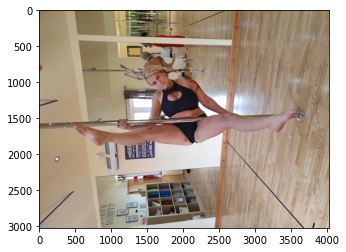

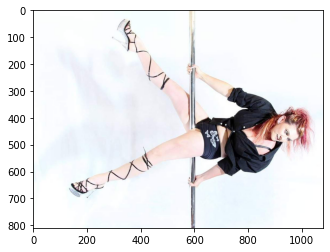

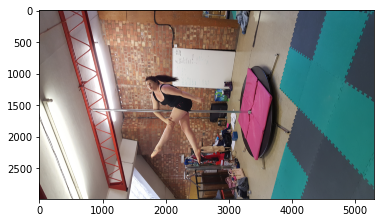

Total superman images: 104



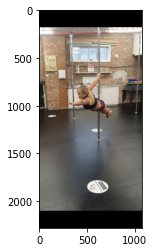

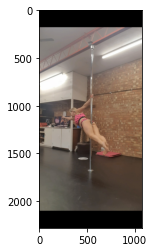

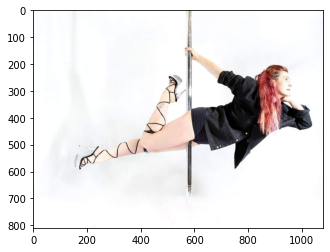

In [ ]:
%matplotlib inline 
from matplotlib import pyplot as plt
import numpy as np

# show first 3 images in image lists
def show_imgs(imageList):
  for i in range(3):
    plt.imshow(imageList[i])
    plt.show()


print("Total butterfly images: " + str(len(butterflyList)) + "\n")
show_imgs(butterflyList)
print("Total scissorSit images: " + str(len(scissorSitList)) + "\n")
show_imgs(scissorSitList)
print("Total superman images: " + str(len(supermanList)) + "\n")
show_imgs(supermanList)

In [ ]:
mainDir = '/content/drive/MyDrive/polePoseRecognitionSplit'
#Comment out if already done

if not os.path.exists(mainDir):
    os.makedirs(mainDir)

# create 3 classes (butterfly,scissorSit,superman)
trainClasses = ['butterfly', 'scissorSit', 'superman']
testClasses = ['testButterfly', 'testScissorSit', 'testSuperman']
# out of sample
oosClasses = ['oosButterfly', 'oosScissorSit', 'oosSuperman']

# training directories
for trainClass in trainClasses:
  if not os.path.exists(mainDir + '/train/' + trainClass):
    os.makedirs(mainDir + '/train/' + trainClass)

# validation directories
for testClass in testClasses:
  if not os.path.exists(mainDir + '/test/' + testClass):
    os.makedirs(mainDir + '/test/' + testClass)

# out of sample test directory
for oosClass in oosClasses:
  if not os.path.exists(mainDir + '/oos/' + oosClass):
    os.makedirs(mainDir + '/oos/' + oosClass)

In [ ]:
#Comment out if complete

# # assigning directory path
myPath = os.path.abspath(mainDir)

# copying to directories
def list_to_dir(classType, classList):
  count = 0
  classCapital = classType[:1].upper() + classType[1:]
  for image in classList:
    listLength = len(classList)
    if count <= (listLength * 0.7): 
      # add to train
      plt.imsave(myPath + '/train/' + classType + '/' + classType + str(count) + '.jpg', image)
    elif count <= (listLength * 0.9): 
      # add to test
      plt.imsave(myPath + '/test/test' + classCapital + '/test' + classCapital +  str(count) + '.jpg', image)
    else: 
      # else add to out of sample
      plt.imsave(myPath + '/oos/oos' + classCapital + '/oos' + classCapital +  str(count) + '.jpg', image)

    count+=1

list_to_dir("butterfly", butterflyList)
list_to_dir("scissorSit", scissorSitList)
list_to_dir("superman", supermanList)

In [ ]:
#Counting images in folders
print("Number of Out of Sample Test class images")
print(len(os.listdir('/content/drive/MyDrive/polePoseRecognitionSplit/oos/oosButterfly')))
print(len(os.listdir('/content/drive/MyDrive/polePoseRecognitionSplit/oos/oosScissorSit')))
print(len(os.listdir('/content/drive/MyDrive/polePoseRecognitionSplit/oos/oosSuperman')))
tOos = len(os.listdir('/content/drive/MyDrive/polePoseRecognitionSplit/oos/oosButterfly')) + len(os.listdir('/content/drive/MyDrive/polePoseRecognitionSplit/oos/oosScissorSit')) + len(os.listdir('/content/drive/MyDrive/polePoseRecognitionSplit/oos/oosSuperman'))
print("Total out-of-sample images:"+ str(tOos) + '\n')

print("Number of Test class images")
print(len(os.listdir('/content/drive/MyDrive/polePoseRecognitionSplit/test/testButterfly')))
print(len(os.listdir('/content/drive/MyDrive/polePoseRecognitionSplit/test/testScissorSit')))
print(len(os.listdir('/content/drive/MyDrive/polePoseRecognitionSplit/test/testSuperman')))
tTest = len(os.listdir('/content/drive/MyDrive/polePoseRecognitionSplit/test/testButterfly')) + len(os.listdir('/content/drive/MyDrive/polePoseRecognitionSplit/test/testScissorSit')) + len(os.listdir('/content/drive/MyDrive/polePoseRecognitionSplit/test/testSuperman'))
print("Total test images:"+ str(tTest) + '\n')
testNo = int(tTest)

print("Number of Training class images")
print(len(os.listdir('/content/drive/MyDrive/polePoseRecognitionSplit/train/butterfly')))
print(len(os.listdir('/content/drive/MyDrive/polePoseRecognitionSplit/train/scissorSit')))
print(len(os.listdir('/content/drive/MyDrive/polePoseRecognitionSplit/train/superman')))
tTrain = len(os.listdir('/content/drive/MyDrive/polePoseRecognitionSplit/train/butterfly')) + len(os.listdir('/content/drive/MyDrive/polePoseRecognitionSplit/train/scissorSit')) + len(os.listdir('/content/drive/MyDrive/polePoseRecognitionSplit/train/superman'))
print("Total train images:"+ str(tTrain) + '\n')
trainNo = int(tTrain)

Number of Out of Sample Test class images
14
11
10
Total out-of-sample images:35

Number of Test class images
28
23
21
Total test images:72

Number of Training class images
100
82
73
Total train images:255



In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

tBatchSize = 30
vBatchSize = 30
#Define imageDataGenerators and Model
TRAINING_DIR = '/content/drive/MyDrive/polePoseRecognitionSplit/train'
training_datagen = ImageDataGenerator(
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      fill_mode='nearest'
)

VALIDATION_DIR = "/content/drive/MyDrive/polePoseRecognitionSplit/test"
validation_datagen=ImageDataGenerator()

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(240,240),
    class_mode='categorical',
    batch_size=tBatchSize
)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(240,240),
    class_mode='categorical',
    batch_size=vBatchSize
)

model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(240, 240, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics='acc')

Found 255 images belonging to 3 classes.
Found 72 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 119, 119, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 117, 117, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 58, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                         

In [ ]:
#Train model
history = model.fit(train_generator,
                    epochs=100,
                    steps_per_epoch=(trainNo/tBatchSize),
                    validation_data=validation_generator,
                    verbose = 1,
                    validation_steps=(testNo/vBatchSize))

Epoch 1/100
8/8 [==============================] - 32s 2s/step - loss: 867.8441 - acc: 0.3059 - val_loss: 1.1342 - val_acc: 0.3611
Epoch 2/100
8/8 [==============================] - 20s 2s/step - loss: 1.0827 - acc: 0.3922 - val_loss: 1.1077 - val_acc: 0.4583
Epoch 3/100
8/8 [==============================] - 20s 2s/step - loss: 1.1226 - acc: 0.3333 - val_loss: 9.9140 - val_acc: 0.3889
Epoch 4/100
8/8 [==============================] - 19s 2s/step - loss: 2.3912 - acc: 0.3608 - val_loss: 3.1206 - val_acc: 0.3194
Epoch 5/100
8/8 [==============================] - 19s 2s/step - loss: 1.3766 - acc: 0.3922 - val_loss: 1.0577 - val_acc: 0.4028
Epoch 6/100
8/8 [==============================] - 19s 2s/step - loss: 1.0176 - acc: 0.4941 - val_loss: 0.9872 - val_acc: 0.3750
Epoch 7/100
8/8 [==============================] - 19s 2s/step - loss: 1.4692 - acc: 0.4980 - val_loss: 1.7978 - val_acc: 0.2639
Epoch 8/100
8/8 [==============================] - 19s 2s/step - loss: 1.5521 - acc: 0.3765 - v

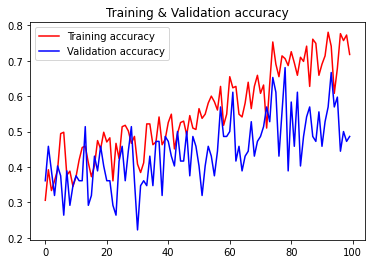

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training & Validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

{0: 'butterfly', 1: 'scissorSit', 2: 'superman'}
Predictions: ['butterfly', 'scissorSit', 'butterfly', 'scissorSit', 'scissorSit', 'superman', 'butterfly', 'superman', 'superman', 'scissorSit', 'superman', 'scissorSit', 'scissorSit', 'scissorSit', 'superman', 'superman', 'superman', 'superman', 'superman', 'superman', 'superman', 'superman', 'scissorSit', 'superman', 'scissorSit', 'superman', 'superman', 'superman', 'superman', 'superman', 'scissorSit', 'superman', 'superman', 'superman', 'superman']
Actual Direction: ['butterfly', 'butterfly', 'butterfly', 'butterfly', 'butterfly', 'butterfly', 'butterfly', 'butterfly', 'butterfly', 'butterfly', 'butterfly', 'butterfly', 'butterfly', 'butterfly', 'scissorSit', 'scissorSit', 'scissorSit', 'scissorSit', 'scissorSit', 'scissorSit', 'scissorSit', 'scissorSit', 'scissorSit', 'scissorSit', 'scissorSit', 'superman', 'superman', 'superman', 'superman', 'superman', 'superman', 'superman', 'superman', 'superman', 'superman']
[[3 7 4]
 [0 2 9]
 

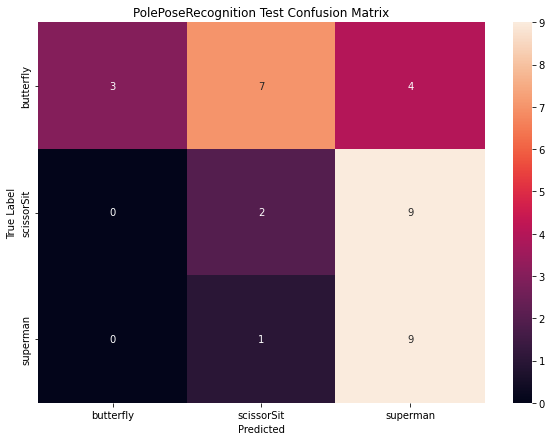

In [ ]:
import numpy as np
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

classesDict = {v: k for k, v in train_generator.class_indices.items()} #shows values of classes as a dictionary,flipped such that {angle:index}
#Testing Out of Sample directory Images by PATH

poseTruth = [] #holds real values of the direction
posePrediction = [] #holds values of predictions
folder_path = '/content/drive/MyDrive/polePoseRecognitionSplit/oos/oos'

def predictArray(folder_path,poseType):
  classCapital = poseType[:1].upper() + poseType[1:]
  folder_path += classCapital
  for img in os.listdir(folder_path):
      img = os.path.join(folder_path, img)
      img = image.load_img(img, target_size=(240,240))
      img = image.img_to_array(img)
      img = np.expand_dims(img, axis=0)
      
      poseTruth.append(poseType)
      images = np.vstack([img])
      classes = model.predict(images, batch_size=1)

      classes = np.transpose(classes)
      classes = classes.reshape((3,))#turns to 1d array of predictions
      classes = np.argmax(classes)#gets most possible class
      classes = classesDict.get(classes)#get direction from index
      posePrediction.append(classes)#adds to prediction array


print(classesDict)
predictArray(folder_path,'butterfly')
predictArray(folder_path,'scissorSit')
predictArray(folder_path,'superman')
print("Predictions:",posePrediction) # array of predicted classes
print("Actual Direction:",poseTruth) # array of truths, made from repeatedly adding chosen direction to an array

#confusion matrix
labels = ["butterfly", "scissorSit", "superman"]
the_matrix = confusion_matrix(poseTruth, posePrediction, labels=labels)
print(the_matrix)

df_cfm = pd.DataFrame(the_matrix, index = labels, columns = labels)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True, fmt='g')
cfm_plot.set_title('PolePoseRecognition Test Confusion Matrix')
cfm_plot.set_xlabel('Predicted')
cfm_plot.set_ylabel('True Label')

from sklearn.metrics import accuracy_score
print("CNN Accuracy:" , accuracy_score(poseTruth, posePrediction))